In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [123]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [125]:
df.shape

(126, 7)

In [127]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [129]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

### Standard Scaling

In [133]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, Y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(Y_test, y_pred))

Accuracy: 68.42%
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.62      0.89      0.73         9

    accuracy                           0.68        19
   macro avg       0.72      0.69      0.68        19
weighted avg       0.73      0.68      0.67        19



### Feature Selection

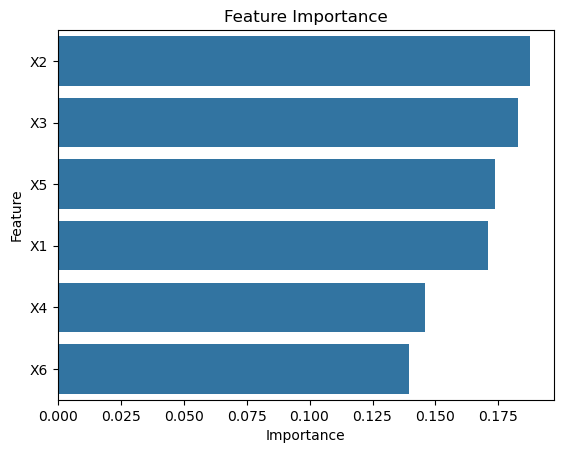

In [136]:
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [138]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(RandomForestClassifier(random_state=42))
selector.fit(X_train_scaled, Y_train)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['X1', 'X2', 'X3', 'X5']


In [141]:
X_updated = df[['X1','X2','X3','X5']]

In [143]:
from sklearn.model_selection import train_test_split
X_train_updated, X_test_updated, Y_train, Y_test = train_test_split(X_updated, Y, test_size=0.15, random_state=42)

In [145]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train_scaled_updated = scaler.fit_transform(X_train_updated)
X_test_scaled_updated = scaler.transform(X_test_updated)

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled_updated, Y_train)
y_pred = model.predict(X_test_scaled_updated)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(Y_test, y_pred))

Accuracy: 73.68%
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.70      0.78      0.74         9

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19



#### Accuracy: 73.68% is achieved